## Logistic Regression

In [ ]:
%pip install pytensor pymc

In [ ]:
import pymc as pm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import arviz as az
import requests
import io

In [ ]:
az.style.use('arviz-darkgrid')

Text(0, 0.5, 'logistic(z)')

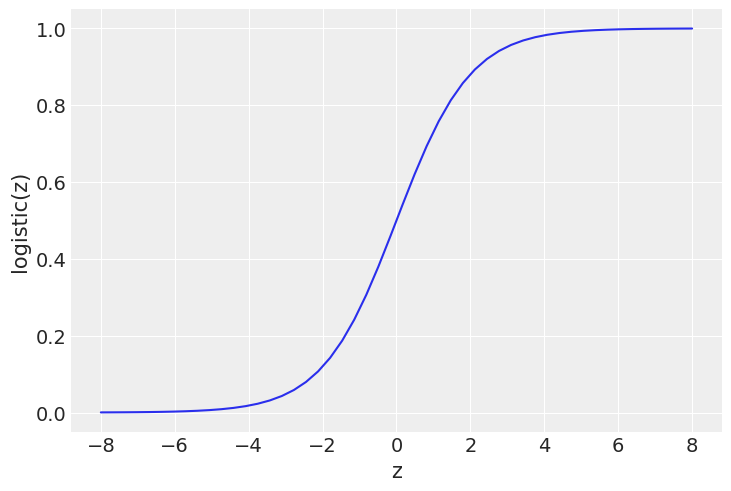

In [ ]:
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('logistic(z)')

### The Iris Dataset

In [ ]:
target_url = 'https://raw.githubusercontent.com/cfteach/brds/main/datasets/iris.csv'

download = requests.get(target_url).content
iris = pd.read_csv(io.StringIO(download.decode('utf-8')))

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<ipython-input-9-caa5570effe5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='petal_width', y='species', inner='stick', palette='Dark2')


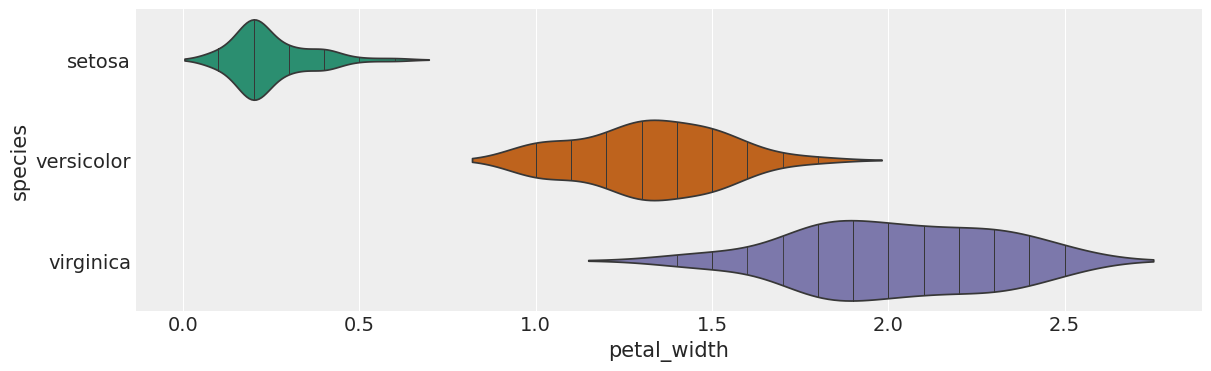

In [ ]:
# species vs petal_width

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='petal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='species', ylabel='sepal_length'>

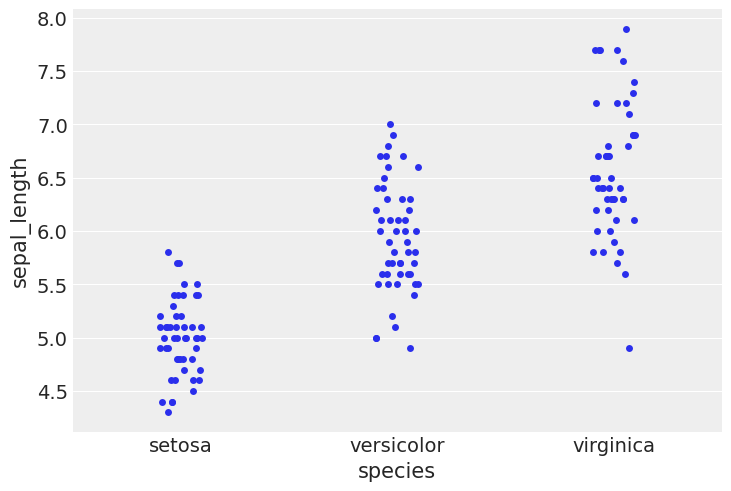

In [ ]:
#using stripplot function from seaborn

sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:213: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


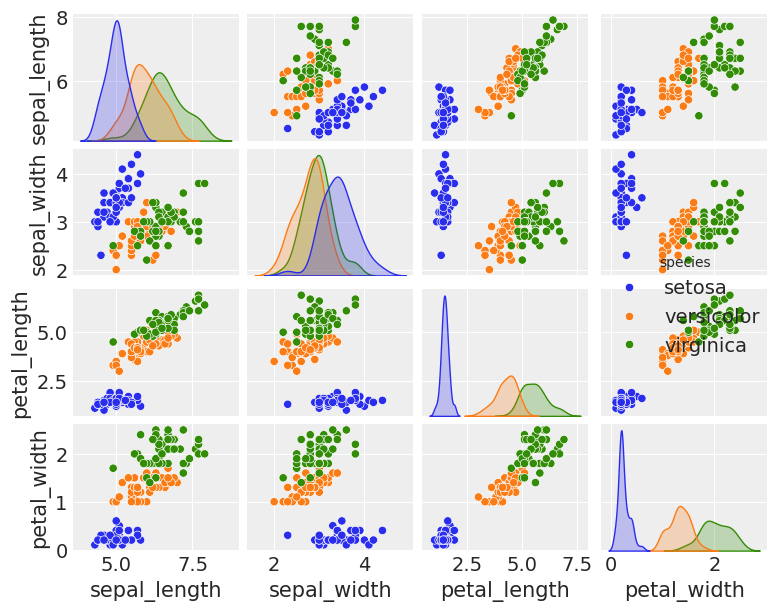

In [ ]:
sns.pairplot(iris, hue='species', diag_kind='kde', height=1.5)

### The logistic model applied to the iris dataset

In [ ]:
df = iris.query("species == ('setosa', 'versicolor')")

In [ ]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [ ]:
# converting the 'species' column of a DataFrame df into categorical codes using Pandas
y_0 = pd.Categorical(df['species']).codes

In [ ]:
y_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [ ]:
# let's select one variate
x_n = 'sepal_length'
x_0 = df[x_n].values
#print(x_0)

# let's center our dataset, as we have done in other exercises
x_c = x_0 - x_0.mean()
print(x_c)

[-0.371 -0.571 -0.771 -0.871 -0.471 -0.071 -0.871 -0.471 -1.071 -0.571
 -0.071 -0.671 -0.671 -1.171  0.329  0.229 -0.071 -0.371  0.229 -0.371
 -0.071 -0.371 -0.871 -0.371 -0.671 -0.471 -0.471 -0.271 -0.271 -0.771
 -0.671 -0.071 -0.271  0.029 -0.571 -0.471  0.029 -0.571 -1.071 -0.371
 -0.471 -0.971 -1.071 -0.471 -0.371 -0.671 -0.371 -0.871 -0.171 -0.471
  1.529  0.929  1.429  0.029  1.029  0.229  0.829 -0.571  1.129 -0.271
 -0.471  0.429  0.529  0.629  0.129  1.229  0.129  0.329  0.729  0.129
  0.429  0.629  0.829  0.629  0.929  1.129  1.329  1.229  0.529  0.229
  0.029  0.029  0.329  0.529 -0.071  0.529  1.229  0.829  0.129  0.029
  0.029  0.629  0.329 -0.471  0.129  0.229  0.229  0.729 -0.371  0.229]


In [ ]:
with pm.Model() as model_logreg:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)

    #μ = α + pm.math.dot(x_c, β)
    μ = α + β * x_c
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)

    yl = pm.Bernoulli('yl', p=θ, observed=y_0)

    idata_logreg = pm.sample(2000, tune = 2000, return_inferencedata=True)

In [ ]:
varnames = ['α', 'β', 'bd']
res = az.summary(idata_logreg)
#print(res)
az.summary(idata_logreg)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.310,0.327,-0.295,0.919,0.006,0.005,3204.0,2411.0,1.0
β,5.383,1.022,3.613,7.437,0.019,0.014,3075.0,2658.0,1.0
θ[0],0.165,0.058,0.068,0.281,0.001,0.001,3771.0,2816.0,1.0
θ[1],0.068,0.036,0.011,0.135,0.001,0.000,3734.0,2777.0,1.0
θ[2],0.027,0.020,0.001,0.064,0.000,0.000,3677.0,2759.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[96],0.815,0.063,0.691,0.924,0.001,0.001,2902.0,2330.0,1.0
θ[97],0.980,0.017,0.950,1.000,0.000,0.000,2851.0,2658.0,1.0
θ[98],0.165,0.058,0.068,0.281,0.001,0.001,3771.0,2816.0,1.0
θ[99],0.815,0.063,0.691,0.924,0.001,0.001,2902.0,2330.0,1.0


In [ ]:
theta_post= idata_logreg.posterior['θ']
print(np.shape(theta_post))

(2, 2000, 100)


([<matplotlib.axis.XTick at 0x7a3276864550>,
 [Text(-1.5, 0, '4.0'),
  Text(-1.0, 0, '4.5'),
  Text(-0.5, 0, '5.0'),
  Text(0.0, 0, '5.5'),
  Text(0.5, 0, '6.0'),
  Text(1.0, 0, '6.5'),
  Text(1.5, 0, '7.0'),
  Text(2.0, 0, '7.5')])

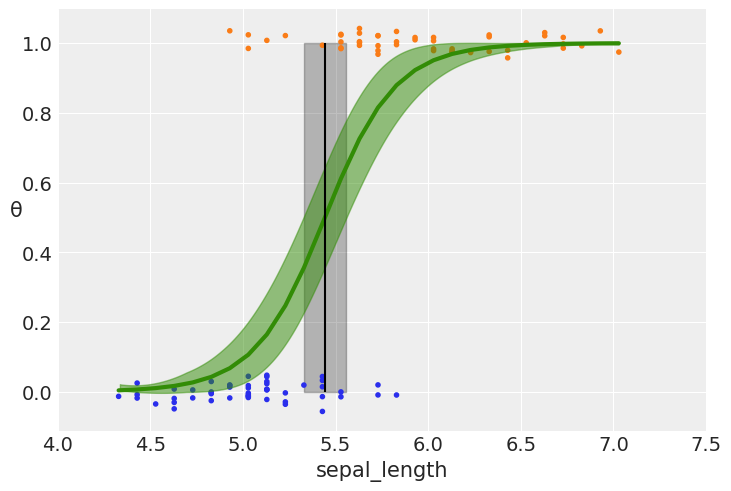

In [ ]:
theta = idata_logreg.posterior['θ'].mean(axis=0).mean(axis=0)
idx = np.argsort(x_c)

np.random.seed(123)

# plotting the sigmoid (logistic) curve
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)

# plotting the mean boundary decision
plt.vlines(idata_logreg.posterior['bd'].mean(), 0, 1, color='k')

# ax.hdi will computer a lower and higher value of bd
bd_hdp = az.hdi(idata_logreg.posterior['bd'], hdi_prob=0.94)


# Fill the area between two vertical curves.
plt.fill_betweenx([0, 1], bd_hdp.bd[0].values, bd_hdp.bd[1].values, color='k', alpha=0.25)


plt.scatter(x_c, np.random.normal(y_0, 0.02),
            marker='.', color=[f'C{x}' for x in y_0]) # 0.02 added for visualization purposes


az.plot_hdi(x_c, idata_logreg.posterior['θ'], color='C2')  #green band


plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))



What happens if you change your priors?

### Multidimensional (feature space) Logistic Regression

In [ ]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

In [ ]:
print(np.shape(x_1), type(x_1))
print(np.shape(y_1), type(y_1))


(100, 2) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>


In [ ]:
np.shape(x_1[:,0])

(100,)

In [ ]:
with pm.Model() as model_1:

    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=2, shape=len(x_n))

    #Data container that registers a data variable with the model.
    #x__1 = pm.Data('x', x_1, mutable=True)
    #y__1 = pm.Data('y', y_1, mutable=True)
    # advantages: Model Reusability; Update Beliefs (reusing model); Efficeincy in sampling (same computational graph, even when data changes)
    #Depending on the mutable setting (default: True), the variable is registered as a SharedVariable, enabling it to be altered in value and shape, but NOT in dimensionality using pymc.set_data().

    μ = α + pm.math.dot(x_1, β)


    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])



    yl = pm.Bernoulli('yl', p=θ, observed=y_1)

    trace_1 = pm.sample(1000, tune=2000, return_inferencedata=True, target_accept=0.9)


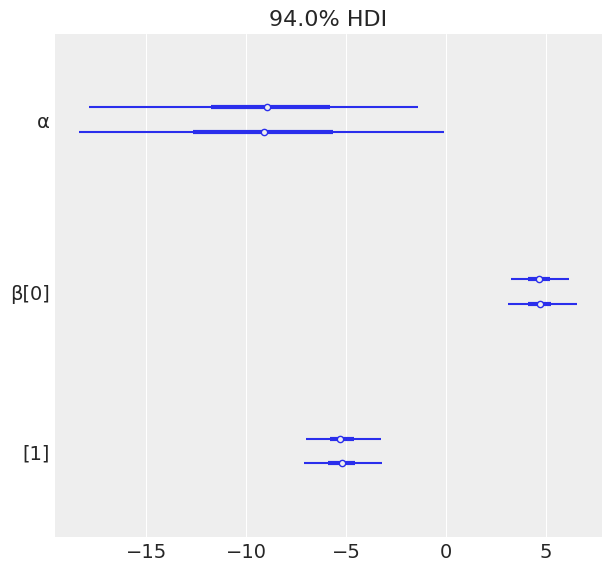

In [ ]:
varnames = ['α', 'β']
az.plot_forest(trace_1, var_names=varnames);

Text(0, 0.5, 'sepal_width')

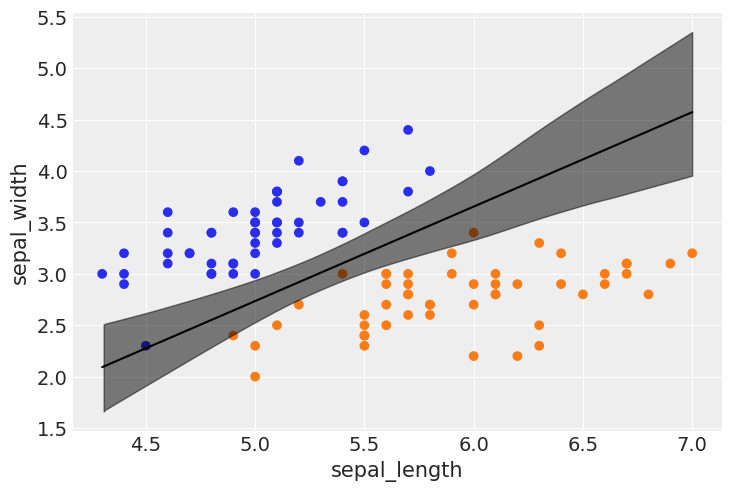

In [ ]:
idx = np.argsort(x_1[:,0])


bd_mean = trace_1.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0])

bd = bd_mean[idx]

plt.plot(x_1[:,0][idx], bd, color='k');


az.plot_hdi(x_1[:,0], trace_1.posterior['bd'], color='k')


plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

* What happens if you change your priors?
* What happens if your decision boundary is not linear? (See below)

### Prediction on unseen data

In [ ]:
print(np.shape(x_1), type(x_1))

udata = np.array(((5.2,2.0),(7.0,2.0),(4.5,5.0),(5.5,3.2)))

print(np.shape(udata), type(udata))

(100, 2) <class 'numpy.ndarray'>
(4, 2) <class 'numpy.ndarray'>


In [ ]:
print(udata)

[[5.2 2. ]
 [7.  2. ]
 [4.5 5. ]
 [5.5 3.2]]


In [ ]:
alpha_chain = trace_1.posterior['α'].mean(axis=0).values
beta_chain  = trace_1.posterior['β'].mean(axis=0).values

print(np.shape(alpha_chain), np.shape(beta_chain))

(1000,) (1000, 2)


In [ ]:
logit = np.dot(udata, beta_chain.T) + alpha_chain
print(np.shape(logit))

(4, 1000)


In [ ]:
probabilities = 1 / (1 + np.exp(-logit))
print(np.shape(probabilities))

(4, 1000)


In [ ]:
# Average probabilities for prediction
mean_probabilities = np.mean(probabilities, axis=1)

# Class assignment (you might adjust the threshold if needed, default is 0.5)
class_assignments = (mean_probabilities > 0.5).astype(int)

# Uncertainty estimation
lower_bound = np.percentile(probabilities, 2.5, axis=1)
upper_bound = np.percentile(probabilities, 97.5, axis=1)

print("\n=======================================")
print("data: \n", udata.T)
print("class, probabilities, ranges(94%HDI): ")
for h,i,j,k in zip(class_assignments, mean_probabilities, lower_bound,upper_bound):
  print(f"class: {h}, mean prob. {i:.4f}, 94% HDI: [{j:.4f},{k:.4f}]")

print("=======================================\n")



data: 
 [[5.2 7.  4.5 5.5]
 [2.  2.  5.  3.2]]
class, probabilities, ranges(94%HDI): 
class: 1, mean prob. 0.9898, 94% HDI: [0.9666,0.9986]
class: 1, mean prob. 1.0000, 94% HDI: [1.0000,1.0000]
class: 0, mean prob. 0.0000, 94% HDI: [0.0000,0.0000]
class: 0, mean prob. 0.4874, 94% HDI: [0.3275,0.6525]



Text(0, 0.5, 'sepal_width')

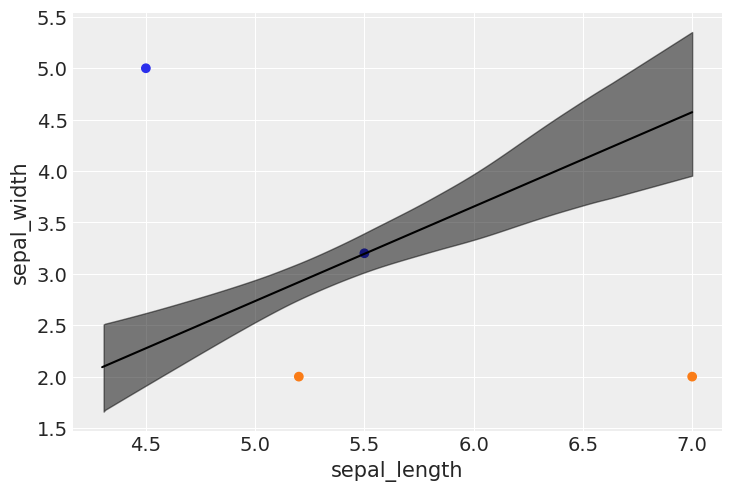

In [ ]:
bd_mean = trace_1.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(udata[:,0], udata[:,1], c=[f'C{x}' for x in class_assignments])

bd = bd_mean[idx]

plt.plot(x_1[:,0][idx], bd, color='k');

az.plot_hdi(x_1[:,0], trace_1.posterior['bd'], color='k')

plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

In [ ]:
np.shape(x_1**2)

(100, 2)

In [ ]:
x_1sq = x_1**2
print(np.shape(x_1sq), np.shape(x_1))

(100, 2) (100, 2)


### Can I use a non-linear decision boundary?

Let's add, for example, a term $\gamma \cdot x_{sepal \ length}^2$ in the equation for $\mu$

In [ ]:
with pm.Model() as model_2:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=2, shape=len(x_n))
    𝛾 = pm.Normal('𝛾', mu=0, sigma=2)

    μ = α + pm.math.dot(x_1, β) + pm.math.dot(x_1[:,0]**2,𝛾)

    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0] - 𝛾/β[1] * x_1[:,0]**2)

    yl = pm.Bernoulli('yl', p=θ, observed=y_1)

    trace_2 = pm.sample(1000, tune=2000, return_inferencedata=True, target_accept=0.95)

In [ ]:
trace_2

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
az.summary(trace_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-2.588,5.816,-14.190,7.282,0.202,0.143,830.0,912.0,1.0
β[0],-0.215,1.781,-3.216,3.336,0.067,0.051,704.0,624.0,1.0
β[1],-5.914,1.136,-8.021,-3.783,0.040,0.030,872.0,836.0,1.0
𝛾,0.765,0.261,0.259,1.238,0.009,0.007,786.0,930.0,1.0
θ[0],0.016,0.014,0.000,0.043,0.000,0.000,925.0,985.0,1.0
...,...,...,...,...,...,...,...,...,...
bd[95],3.564,0.157,3.255,3.842,0.004,0.003,1613.0,1583.0,1.0
bd[96],3.564,0.157,3.255,3.842,0.004,0.003,1613.0,1583.0,1.0
bd[97],4.326,0.301,3.756,4.865,0.008,0.006,1452.0,1530.0,1.0
bd[98],2.737,0.117,2.510,2.941,0.003,0.002,1662.0,1525.0,1.0


(100,)


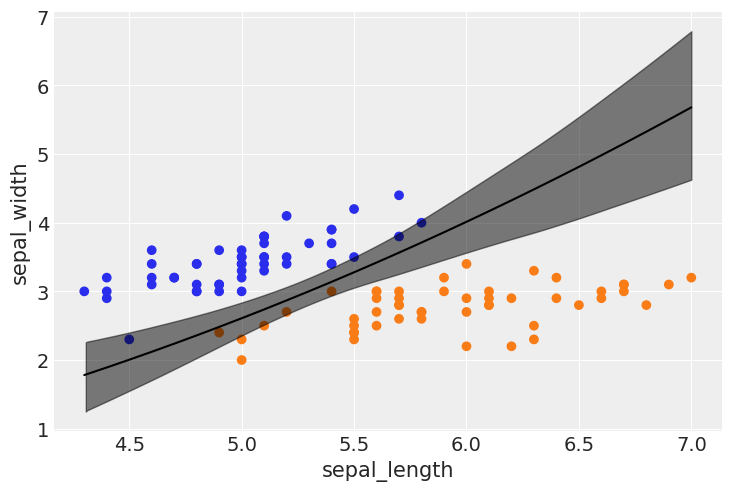

In [ ]:
idx = np.argsort(x_1[:,0])


bd_mean2 = trace_2.posterior['bd'].mean(axis=0).mean(axis=0)


plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0])

bd = bd_mean2[idx]

plt.plot(x_1[:,0][idx], bd, color='k');


az.plot_hdi(x_1[:,0], trace_2.posterior['bd'], color='k')


plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

print(np.shape(bd_mean2))